In [55]:
from cv2 import xfeatures2d
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans

In [56]:
df = pd.read_csv("Data_Entry_2017.csv")
data = df[["Image Index", "Finding Labels"]]
diagnosis_map = dict();
diagnosis_set = set();

for key, val in data.values:
    diagnosis_map[key] = val.split('|')
    for d in diagnosis_map[key]:
        diagnosis_set.add(d)
    
diagnosis_idx = {v:i for i, v in enumerate(diagnosis_set)}
diagnosis_idx_inv = {v:k for k, v in diagnosis_idx.items()}

def construct_output_vector(diagnosis):
    v = [0 for _ in range(len(diagnosis_idx))]
    
    for d in diagnosis:
        v[diagnosis_idx[d]] = 1
        
    return v


''

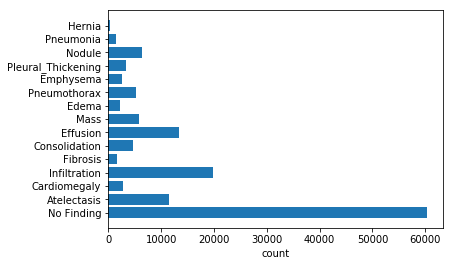

In [57]:
diagnosis_freq = [0 for _ in range(len(diagnosis_idx))]

for key, val in diagnosis_map.items():
    for d in val:
        diagnosis_freq[diagnosis_idx[d]] += 1
        
from matplotlib import pyplot as plt

ticks = [None for _ in range(len(diagnosis_idx))]
for key, val in diagnosis_idx.items():
    ticks[val] = key

plt.barh(range(len(diagnosis_idx)), diagnosis_freq)
plt.yticks(range(len(diagnosis_idx)), ticks)
plt.xlabel('count')

''

In [58]:
train_list_fn = 'train_val_list.txt'
test_list_fn = 'test_list.txt'

fi = open(train_list_fn, 'r')
train_list = list(map(lambda s: s.strip(), fi.readlines()))
fi.close()

fi = open(test_list_fn, 'r')
test_list = list(map(lambda s: s.strip(), fi.readlines()))
fi.close()

train_diagnosis_vectors = [construct_output_vector(diagnosis_map[fn]) for fn in train_list]
test_diagnosis_vectors = [construct_output_vector(diagnosis_map[fn]) for fn in test_list]

In [17]:
sift = xfeatures2d.SIFT_create()

in_dir = 'images/'

def get_image_descriptors(fn):
    im = cv2.imread(fn)
    im = cv2.resize(im, (128, 128))
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    _, descriptors = sift.detectAndCompute(gray_im, None)
    
    return descriptors

import time
start = time.time()

train_image_descriptors = [get_image_descriptors(in_dir + fn) for fn in train_list[:1000]]
test_image_descriptors = [get_image_descriptors(in_dir + fn) for fn in test_list[:100]]

end = time.time()
print(end - start)

23.74214768409729


In [62]:
kmeans = MiniBatchKMeans(n_clusters=1000, init)
# kmeans.inertia_

flattened = np.concatenate(train_image_descriptors)
# rand_ids = np.random.choice(len(flattened), 10000)

kmeans.fit(flattened)
kmeans.inertia_

3655706000.0

In [197]:
im = cv2.imread("images/00000643_007.png")
im = cv2.resize(im, (256, 256))
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

import time
start = time.time()

sift = xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

end = time.time()
print(end - start)

im_sift = cv2.drawKeypoints(gray, keypoints, im);

cv2.imshow("image", im_sift)
cv2.waitKey(0)
cv2.destroyAllWindows()

# len(keypoints)

0.0184328556060791


In [123]:
demo_list = [list() for _ in range(len(diagnosis_idx))]

i = 0
n_per_type = 5
demo_count = 0
demo_quota = len(diagnosis_idx) * n_per_type
while True:
    for d in diagnosis_map[train_list[i]]:
        if len(demo_list[diagnosis_idx[d]]) < n_per_type:
            demo_list[diagnosis_idx[d]].append(i)
            demo_count += 1

    if demo_count == demo_quota:
        break
        
    i += 1
    
in_dir = 'images/'
out_dir = 'demo_images/'
for i in range(len(demo_list)):
    for j in range(len(demo_list[i])):
        im = cv2.imread(in_dir + train_list[demo_list[i][j]])
        w128h128 = cv2.resize(im, (128, 128))
        cv2.imwrite(out_dir + diagnosis_idx_inv[i] + '{}.png'.format(j), w128h128)

[[2, 12, 20, 29, 33],
 [179, 234, 282, 283, 284],
 [1, 18, 53, 60, 80],
 [26, 37, 56, 57, 59],
 [82, 93, 164, 166, 257],
 [0, 1, 2, 15, 59],
 [4, 29, 49, 82, 142],
 [153, 158, 161, 379, 572],
 [314, 1083, 1084, 1865, 2475],
 [4, 17, 33, 41, 49],
 [39, 40, 44, 50, 59],
 [3, 5, 6, 7, 8],
 [37, 38, 40, 54, 94],
 [130, 153, 156, 421, 452],
 [11, 12, 19, 25, 27]]